In [1]:
from clean import clean

In [2]:
df = clean('./data/train.csv')

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,year,month,week,day,...,StateHoliday_new,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353.0,3139.0,820.0,1,0.0,1.0,2013,1,1,1,...,a,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,353.0,2686.0,835.0,1,0.0,1.0,2013,1,1,2,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
2,353.0,2628.0,815.0,1,0.0,1.0,2013,1,1,3,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
3,353.0,2677.0,856.0,1,0.0,1.0,2013,1,1,4,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
4,353.0,2224.0,719.0,1,0.0,0.0,2013,1,1,5,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"


In [4]:
df['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [5]:
df['month_start'].unique()

array([ True, False])

In [6]:
from feature_engineering import * 

creating conversion table


/Users/elenastein/DSR/m_comp/feature_engineering.py:14: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  conversion = creating_conversion_table()
/Users/elenastein/DSR/m_comp/feature_engineering.py:16: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  df = creating_df_with_sorted_id(conversion)


converting the holidays


In [7]:
df.isna().sum()

Store                        0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
year                         0
month                        0
week                         0
day                          0
day_week                     0
month_start                  0
month_end                    0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
sorted id                    0
holiday_bool                 0
dtype: int64

In [8]:
#fill with average competition distance, month and year, Promo2 Since Week, Promo since year
df[df['Promo2']==0].isna().sum()
df.PromoInterval.unique()

array(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'None'],
      dtype=object)

In [100]:
#error metric
import numpy as np
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [10]:
my_imputer = SimpleImputer(strategy='mean')
final_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [197]:
X_train = pd.read_csv('./X_train.csv', index_col=0)
X_valid = pd.read_csv('./X_valid.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_valid = pd.read_csv('./y_valid.csv', index_col=0)

In [94]:
y_train.head()

,Sales
75551,5142.0
483316,6021.0
372576,3951.0
172865,6495.0
181136,8521.0


In [96]:
X_train.head()
X_valid.head()
y_train.head()
y_valid.head()

,Sales
318895,10472.0
14935,2774.0
474897,8715.0
180307,5450.0
164791,3607.0


In [99]:
y_valid.values.shape

(99476, 1)

In [109]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error
m = []
for i in range(2,10,2):
    forest_model = RandomForestRegressor(max_depth=i , random_state=1)
    forest_model.fit(X_train, y_train)
    preds = forest_model.predict(X_valid)
    m.append(metric(preds, y_valid.values))

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

In [119]:
X_train.head()

,Store,Customers,Open,Promo,SchoolHoliday,year,month,week,day,day_week,...,1,2,3,4,5,6,7,8,9,10
75551,495.0,418.0,1,1.0,1.0,2013,8,35,29,3,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
483316,929.0,769.0,1,1.0,0.0,2013,10,43,22,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
372576,693.0,344.0,1,0.0,0.0,2013,4,16,18,3,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
172865,51.0,463.0,1,1.0,0.0,2014,3,12,18,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
181136,138.0,804.0,1,0.0,0.0,2013,12,50,10,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [153]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
forest_model.feature_importances_

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([1.03617018e-02, 7.17914570e-01, 0.00000000e+00, 4.41949983e-02,
       7.84554744e-04, 1.22549648e-03, 4.43021345e-03, 8.82550411e-03,
       8.08762541e-03, 1.88571955e-02, 1.07429569e-04, 9.87415138e-04,
       2.33646600e-02, 5.74959066e-03, 5.76461314e-03, 4.74353838e-04,
       5.18656010e-03, 2.50834550e-03, 9.35328504e-02, 2.08702405e-04,
       6.69470532e-04, 8.87418311e-03, 6.07215470e-04, 2.52751052e-02,
       8.76851571e-04, 7.59706530e-03, 7.93038531e-04, 6.31077001e-04,
       1.16575260e-03, 4.50440406e-04, 4.93419228e-04])

(31, 2)
                                  0
Customers                  0.331405
sorted id                  2.369443
Promo                      3.119144
3                          3.677935
CompetitionDistance        3.756531
day_week                   3.970861
Store                      4.569639
1                          4.724609
week                       4.730110
day                        4.817420
5                          4.879993
CompetitionOpenSinceYear   5.156017
CompetitionOpenSinceMonth  5.158627
Promo2SinceWeek            5.261685
month                      5.419308
Promo2SinceYear            5.988132
year                       6.704409
8                          6.754388
month_end                  6.920420
4                          7.039173
6                          7.139639
SchoolHoliday              7.150394
0                          7.309023
7                          7.368083
2                          7.406627
10                         7.614151
Promo2              

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


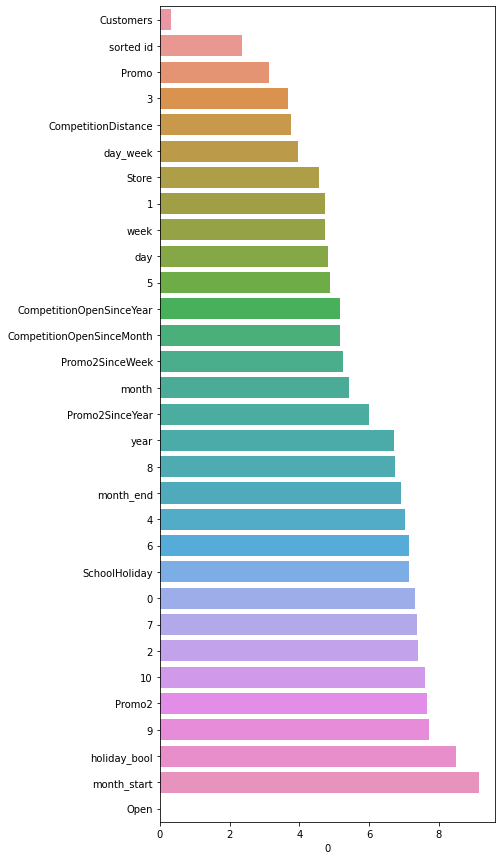

In [154]:
feat_imp = forest_model.feature_importances_
import matplotlib.pyplot as plt
import seaborn as sns
x = X_train.columns
y = feat_imp
temp = np.array([x,y]).T
temp_df = pd.DataFrame(np.log(1/y), index=x)
temp_df.sort_values(by=0, inplace=True)
temp_df.head()
#temp = np.sort(temp)
print(np.shape(temp))
print(temp_df)
fig, ax = plt.subplots(figsize=(6, 15))
#ax.barh(x, np.log(1/y))

sns.barplot(y=temp_df.index, x=0, data=temp_df)
            
            #np.log(1/y), x)


In [269]:
cut_feat = list(temp_df.index[:10])

feat = [i.replace('\n', '') for i in temp_df.index]
feat[:10]
#X_train = X_train[feat]
#X_valid = X_valid[feat]
X_train.head()
#X_valid.head()

,Customers,sorted id,Promo,3,CompetitionDistance,day_week,Store,1,week,day
313286,436.0,19,0.0,0.0,3000.0,5,558.0,0.0,7,15
135907,843.0,955,1.0,0.0,17500.0,1,71.0,0.0,29,15
78880,420.0,240,0.0,1.0,18610.0,4,521.0,0.0,30,25
99940,397.0,21,1.0,0.0,910.0,3,435.0,0.0,15,11
371635,698.0,703,1.0,1.0,2140.0,0,661.0,0.0,29,14


In [202]:
from xgboost import XGBRegressor
parameters = {'learning_rate':[0.3]}
clf = GridSearchCV(XGBRegressor(), parameters, scoring=make_scorer(metric, greater_is_better=False), cv=4)
tmp = clf.fit(X_train.iloc[0:200_000,:], y_train.iloc[0:200_000, :])
tmp.cv_results_

{'mean_fit_time': array([6.61352825]),
 'std_fit_time': array([0.31393539]),
 'mean_score_time': array([0.15857208]),
 'std_score_time': array([0.00518386]),
 'param_learning_rate': masked_array(data=[0.3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.3}],
 'split0_test_score': array([8.31497912]),
 'split1_test_score': array([8.24883153]),
 'split2_test_score': array([8.40525989]),
 'split3_test_score': array([8.19929813]),
 'mean_test_score': array([8.29209217]),
 'std_test_score': array([0.07715725]),
 'rank_test_score': array([1], dtype=int32)}

100  23.66421750132456 2.1706864176542797e-05
1000  15.510599631893616 0.4343004611895709
10000  10.80432361557537 5.602452506549815
30000  9.335668705812328 7.107056601312248
100000  8.633785867358965 7.778782118511851
300000  8.321176319748208 7.978143345258218


In [231]:
errors

,test_score,train_score
100,23.6642,2.17069e-05
1000,15.5106,0.4343
10000,10.8043,5.60245
30000,9.33567,7.10706
100000,8.63379,7.77878
300000,8.32118,7.97814


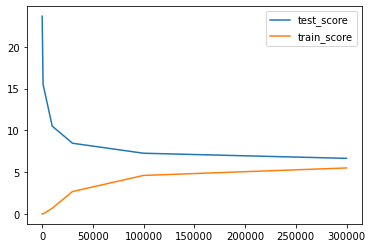

In [241]:
import matplotlib.pyplot as plt
errors.plot()

In [173]:
cv_results = cross_val_score(RandomForestRegressor(n_jobs), X_train.iloc[0:1000,:], y_train.iloc[0:1000, :], scoring=make_scorer(metric, greater_is_better=False),cv=5) 

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/elenastein/opt/anaconda3/envs/dkb

# Here we used all features - we got almost the same results of with just 10 features

In [240]:
# Here we used all features - we got almost the same results of with just 10 features

parameters = {'learning_rate':[0.3]}
clf = GridSearchCV(XGBRegressor(n_estimators=600), parameters, scoring=make_scorer(metric, greater_is_better=False), cv=4, n_jobs=3, return_train_score=True)

samples = [100, 1000, 10_000, 30_000, 100_000, 300_000]
errors_pushing = pd.DataFrame(columns=['test_score', 'train_score'], index=samples)


for nr_samples in samples:
    
    tmp = clf.fit(X_train.iloc[0:nr_samples,:], y_train.iloc[0:nr_samples, :])
    print(str(nr_samples)+"  "+str(tmp.cv_results_['mean_test_score'][0])+" "+str(tmp.cv_results_['mean_train_score'][0]))
    errors_pushing.loc[nr_samples, 'test_score'] = tmp.cv_results_['mean_test_score'][0]
    errors_pushing.loc[nr_samples, 'train_score'] = tmp.cv_results_['mean_train_score'][0]

    

100  23.664135326230895 1.1394355013784015e-05
1000  15.507151013990239 3.136034273356748e-05
10000  10.510627470089108 0.6755409217532157
30000  8.462310268234361 2.679095584222545
100000  7.263121751645629 4.607338383127853
300000  6.6534794432308395 5.502146684678944


In [ ]:
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05)
my_model.fit(x_training, y_training)

In [218]:
tmp.cv_results_

{'mean_fit_time': array([0.06024808]),
 'std_fit_time': array([0.00650164]),
 'mean_score_time': array([0.00249165]),
 'std_score_time': array([0.00014823]),
 'param_learning_rate': masked_array(data=[0.3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.3}],
 'split0_test_score': array([14.01622213]),
 'split1_test_score': array([16.61803262]),
 'split2_test_score': array([14.72097801]),
 'split3_test_score': array([16.68716577]),
 'mean_test_score': array([15.51059963]),
 'std_test_score': array([1.16912169]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.41235314]),
 'split1_train_score': array([0.45073584]),
 'split2_train_score': array([0.43287242]),
 'split3_train_score': array([0.44124043]),
 'mean_train_score': array([0.43430046]),
 'std_train_score': array([0.01415988])}

# Using just 10 features
Customers	sorted id	Promo	3	CompetitionDistance	day_week	Store	1	week	day - here we used the top 10 features

In [265]:
# features we used for this 
#Customers	sorted id	Promo	3	CompetitionDistance	day_week	Store	1	week	day - here we used the top 10 features

parameters = {'learning_rate':[0.3]}
clf = GridSearchCV(XGBRegressor(n_estimators=600), parameters, scoring=make_scorer(metric, greater_is_better=False), cv=4, n_jobs=3, return_train_score=True)

samples = [100, 1000, 10_000, 30_000, 100_000, 300_000]
errors_pushing = pd.DataFrame(columns=['test_score', 'train_score'], index=samples)


for nr_samples in samples:
    
    tmp = clf.fit(X_train.iloc[0:nr_samples,:], y_train.iloc[0:nr_samples, :])
    print(str(nr_samples)+"  "+str(tmp.cv_results_['mean_test_score'][0])+" "+str(tmp.cv_results_['mean_train_score'][0]))
    errors_pushing.loc[nr_samples, 'test_score'] = tmp.cv_results_['mean_test_score'][0]
    errors_pushing.loc[nr_samples, 'train_score'] = tmp.cv_results_['mean_train_score'][0]

    

100  22.74454469763609 1.532986664168997e-05
1000  16.069612358813778 3.8479295802995314e-05
10000  11.02148548763216 0.9219467605297327
30000  8.766727984001855 3.0338135163807376
100000  7.437541704897674 4.891787764267888
300000  6.838566985456159 5.740130818420243


In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [217]:
tmp.return_train_score

True

In [163]:
y_train.head()

,Sales
75551,5142.0
483316,6021.0
372576,3951.0
172865,6495.0
181136,8521.0


In [169]:
#error metric
import numpy as np
def metric(actuals, preds):
    actuals = actuals.values
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return -100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [31]:
print(metric(preds, y_valid.values))

array([[197691.91,   4793.4 ],
       [309286.88,   8327.59],
       [ 63305.92,   5353.39],
       ...,
       [210790.93,   7711.  ],
       [188874.07,   5446.08],
       [244415.9 ,   7847.61]])

In [ ]:
# TESTING
#forest_model = RandomForestRegressor(random_state=1) = 7.246610152090087

#forest_model = RandomForestRegressor(max_depth=2, random_state=1) = 33.14971645167395
#2,4,6,8 
#[33.14971645167395, 21.5001607346899, 16.65629986767037, 13.995240592959204]


In [111]:
from sklearn.model_selection import cross_val_score
forest_model = RandomForestRegressor(max_depth=i , random_state=1)

scores = cross_val_score(forest_model, X, y, cv=4, scoring='metric')

ValueError: 'metric' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [66]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return actuals

In [46]:
y_valid[y_valid['Sales']==0].shape

(0, 2)

In [68]:
actuals = metric(preds, y_valid.values)

In [71]:
O in actual 

(198952,)

In [73]:
0 in y_valid.loc[:, 'Sales'].values 

False

In [45]:
np.linalg.norm(0)

0.0

In [83]:
df = pd.read_csv('./transformed.csv', index_col=0)

In [84]:
df.head()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,year,month,week,day,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sorted id,holiday_bool
0,353.0,3139.0,820.0,1,0.0,1.0,2013,1,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,1
1,353.0,2686.0,835.0,1,0.0,1.0,2013,1,1,2,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
2,353.0,2628.0,815.0,1,0.0,1.0,2013,1,1,3,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
3,353.0,2677.0,856.0,1,0.0,1.0,2013,1,1,4,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
4,353.0,2224.0,719.0,1,0.0,0.0,2013,1,1,5,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0


In [48]:
np.sqrt(preds.shape[0])

315.39816105995294

In [50]:
np.linalg.norm(1/y_valid.values)

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

In [54]:
y_valid[y_valid['Sales']<=0]

,Unnamed: 0,Sales


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d7231d30>,
      dtype=object)

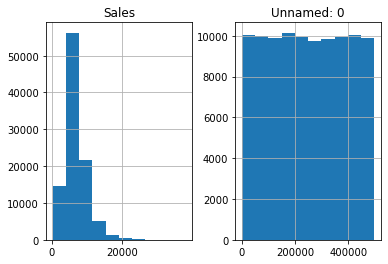

In [55]:
y_valid.hist()

In [59]:
predictions_df = pd.DataFrame(preds)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d46bd400>,
      dtype=object)

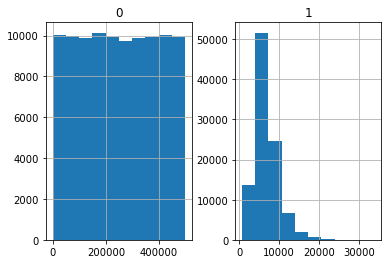

In [62]:
predictions_df.hist()

In [74]:
y_valid.shape

(99476, 2)

In [76]:
y_valid.values.reshape(-1).shape

(198952,)

In [79]:
a = np.array([[1, 2, 3],[4, 5, 6]])
a.

array([[1, 2, 3],
       [4, 5, 6]])

In [80]:
a.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [82]:
preds.shape

(99476, 2)

In [85]:
y_valid

,Unnamed: 0,Sales
0,197700,4500.0
1,309290,8276.0
2,63347,5036.0
3,331547,4239.0
4,346200,3444.0
...,...,...
99471,51139,5007.0
99472,439412,4232.0
99473,210855,7256.0
99474,188898,5492.0


In [90]:
from feature_engineering import *

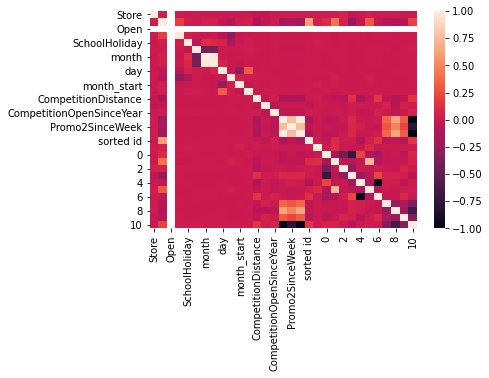

In [244]:
import seaborn as sns
sns.heatmap(X_train.corr())